소프트웨어학부 20186663 전찬웅 - assignment7

In [22]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

In [23]:
xy_list = []
for i in range(10):
    for j in range(10):
        xy_list.append((pointX**i)*(pointY**j))
xy = np.array(xy_list)

In [24]:
label_np = np.array(label)
label_np = label_np.reshape(1,118)
cost1 = []
cost2 = []
cost3 = []
accuracy1 = []
accuracy2 = []
accuracy3 = []
lamda1= 1
lamda2= 0.01
lamda3= 0.0001
theta1 = np.zeros([100,1])
theta2 = np.zeros([100,1])
theta3 = np.zeros([100,1])
learning_rate = 0.01

In [25]:
for i in range(30000):
    a1=0
    a2=0
    a3=0
    g_xy1 = (theta1*xy).sum(axis=0)
    g_xy1 = g_xy1.reshape(1,118)
    sigmoid_g1 = 1/(1+np.exp(-g_xy1))
    
    g_xy2 = (theta2*xy).sum(axis=0)
    g_xy2 = g_xy2.reshape(1,118)
    sigmoid_g2 = 1/(1+np.exp(-g_xy2))
    
    g_xy3 = (theta3*xy).sum(axis=0)
    g_xy3 = g_xy3.reshape(1,118)
    sigmoid_g3 = 1/(1+np.exp(-g_xy3))
    
    for j in range(len(pointX)):
        if label_np[0,j]== 1:
            if sigmoid_g1[0,j]>0.5:
                a1 += 1
            if sigmoid_g2[0,j]>0.5:
                a2 += 1
            if sigmoid_g3[0,j]>0.5:
                a3 += 1
        else:
            if sigmoid_g1[0,j]<0.5:
                a1 += 1
            if sigmoid_g2[0,j]<0.5:
                a2 += 1
            if sigmoid_g3[0,j]<0.5:
                a3 += 1
    accuracy1.append(a1*100/len(pointX))
    accuracy2.append(a2*100/len(pointX))
    accuracy3.append(a3*100/len(pointX))
    
    cost = np.sum(-label_np*np.log(sigmoid_g1)-(1-label_np)*np.log(1-sigmoid_g1))/len(pointX) + (lamda1/2)*np.sum(theta1**2)
    cost1.append(cost)
    cost = np.sum(-label_np*np.log(sigmoid_g2)-(1-label_np)*np.log(1-sigmoid_g2))/len(pointX) + (lamda2/2)*np.sum(theta2**2)
    cost2.append(cost)
    cost = np.sum(-label_np*np.log(sigmoid_g3)-(1-label_np)*np.log(1-sigmoid_g3))/len(pointX) + (lamda3/2)*np.sum(theta3**2)
    cost3.append(cost)
    for j in range(100):
        XY = xy[j,:]
        XY = XY.reshape((1,118))
        theta1[j,0] = theta1[j,0] - learning_rate*(np.sum((sigmoid_g1-label_np)*XY)/len(pointX) + lamda1*theta1[j,0])
        theta2[j,0] = theta2[j,0] - learning_rate*(np.sum((sigmoid_g2-label_np)*XY)/len(pointX) + lamda2*theta2[j,0])
        theta3[j,0] = theta3[j,0] - learning_rate*(np.sum((sigmoid_g3-label_np)*XY)/len(pointX) + lamda3*theta3[j,0])


In [26]:
plt.figure()
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
XX, YY = np.meshgrid(x, y)
XX = XX.reshape(1,40000)
YY = YY.reshape(1,40000)
ZZ1_list = []
ZZ2_list = []
ZZ3_list = []
for i in range(10):
    for j in range(10):
        ZZ1_list.append((XX**i)*(YY**j))
        ZZ2_list.append((XX**i)*(YY**j))
        ZZ3_list.append((XX**i)*(YY**j))
ZZ1 = np.array(ZZ1_list)
ZZ1 = ZZ1.reshape(100,40000)
ZZ2 = np.array(ZZ2_list)
ZZ2 = ZZ2.reshape(100,40000)
ZZ3 = np.array(ZZ3_list)
ZZ3 = ZZ3.reshape(100,40000)
zz1 = np.dot(theta1.T,ZZ1)
zz2 = np.dot(theta2.T,ZZ2) 
zz3 = np.dot(theta3.T,ZZ3)
zz1 = zz1.reshape(200,200)
zz2 = zz2.reshape(200,200)
zz3 = zz3.reshape(200,200)
XX = XX.reshape(200,200)
YY = YY.reshape(200,200)

<Figure size 432x288 with 0 Axes>

# conclusion

- Plot the training data

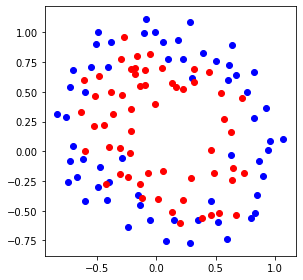

In [27]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

- Plot the training error with varying regularization parameters

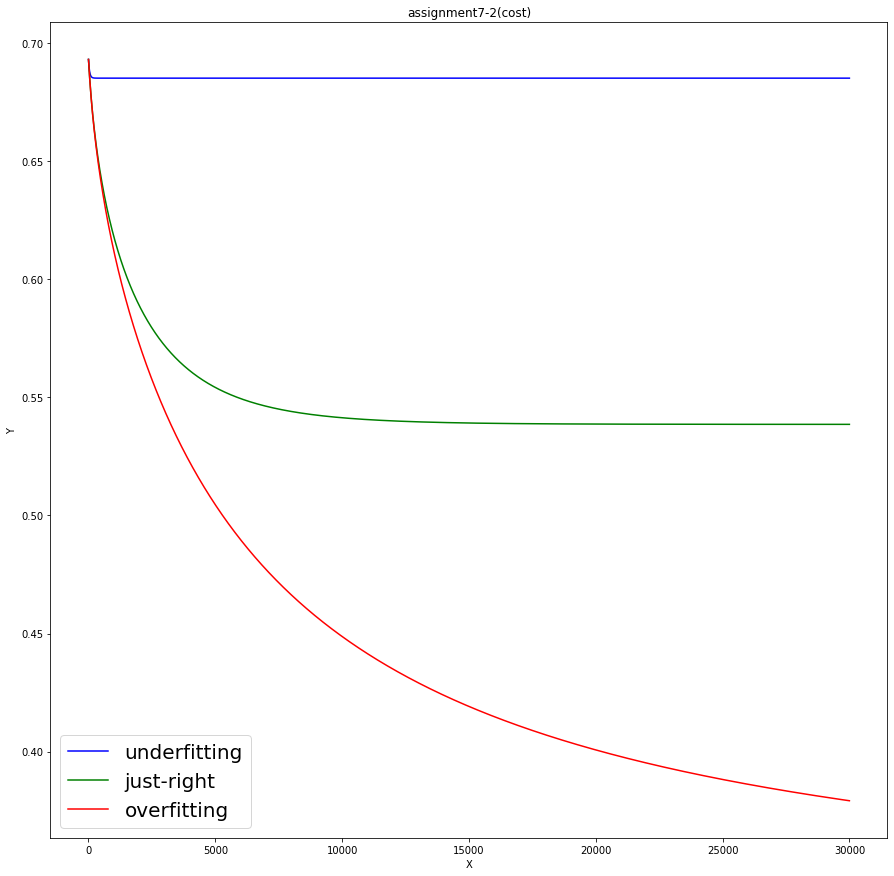

In [28]:
plt.figure(figsize=(15, 15))
plt.title("assignment7-2(cost)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(30000),cost1,color='b')
plt.plot(range(30000),cost2,color='g')
plt.plot(range(30000),cost3,color='r')
plt.legend(['underfitting','just-right','overfitting'], prop={'size': 20})
plt.show()

- Display the values of the chosen regularization parameters

In [29]:
print('\033[31m' + "overfitting lambda:",lamda3)
print('\033[32m' + "just-right lambda:",lamda2)
print('\033[34m' + "underfitting lambda:",lamda1)

overfitting lambda: 0.0001
just-right lambda: 0.01
underfitting lambda: 1


- Plot the training accuracy with varying regularization parameters

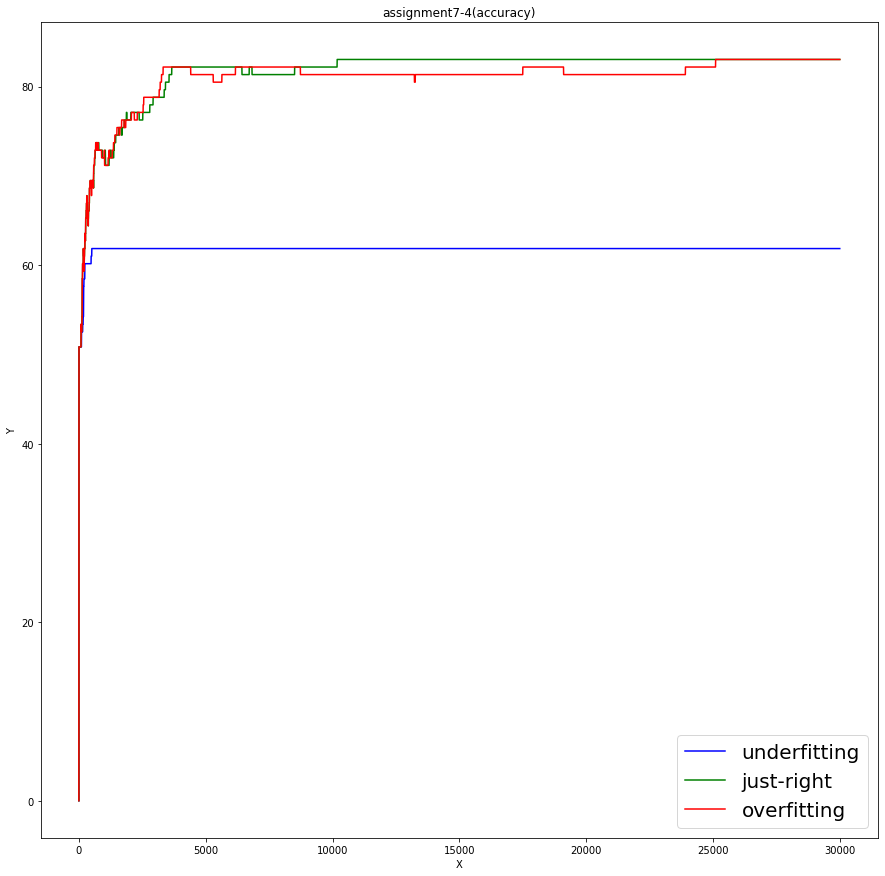

In [30]:
plt.figure(figsize=(15, 15))
plt.title("assignment7-4(accuracy)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(30000),accuracy1,color='b')
plt.plot(range(30000),accuracy2,color='g')
plt.plot(range(30000),accuracy3,color='r')
plt.legend(['underfitting','just-right','overfitting'], prop={'size': 20})
plt.show()

- Display the final training accuracy with varying regularization parameters

In [31]:
print('\033[31m' + "overfitting final training accuracy:",accuracy3[-1])
print('\033[32m' + "just-right final training accuracy:",accuracy2[-1])
print('\033[34m' + "underfitting final training accuracy:",accuracy1[-1])

overfitting final training accuracy: 83.05084745762711
just-right final training accuracy: 83.05084745762711
underfitting final training accuracy: 61.86440677966102


- Plot the optimal classifier with varying regularization parameters superimposed on the training data

/home/jeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'c'
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'c'
  after removing the cwd from sys.path.
/home/jeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'c'
  """


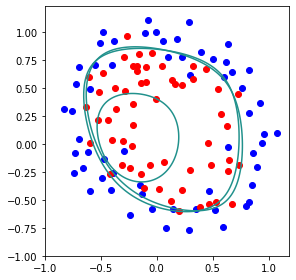

In [32]:
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.contour(XX, YY, zz1, c = 'g',levels=0)
plt.contour(XX, YY, zz2, c = 'g',levels=0)
plt.contour(XX, YY, zz3, c = 'g',levels=0)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()